In [155]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data_limit = pd.read_parquet('../data/taxis_clean.parquet')

In [113]:
data = data_limit.iloc[:1000000]

In [174]:
data.head(2)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,fare_amount,total_amount,zone,borough,trip_duration,pickup_hour,distance_bin
0,VeriFone Inc,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,Cash,17.7,22.7,Penn Station/Madison Sq West,Manhattan,19.8,0,1-2
1,VeriFone Inc,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,Cash,17.7,22.7,Penn Station/Madison Sq West,Manhattan,19.8,0,1-2


In [141]:
# Seleccionar características (features) y etiquetas (labels)
X = data[['trip_distance', 'trip_duration']]
y = data['fare_amount']

In [142]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
print(f'Dimensiones de X: {X.shape}')  # Dimensiones de los features
print(f'Dimensiones de y: {y.shape}')  # Dimensiones de las etiquetas
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

Dimensiones de X: (1000000, 2)
Dimensiones de y: (1000000,)
(200000, 2)
(800000, 2)
(200000,)
(800000,)


# Modelo de Regresión Lineal

In [118]:
# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# Revisar si hay valores nulos en las columnas seleccionadas
print(data[['trip_distance', 'trip_duration', 'fare_amount']].isnull().sum())

trip_distance    0
trip_duration    0
fare_amount      0
dtype: int64


## Evaluar un modelo de regresion usando diferentes metricas, usaremos:

* Mean Squared Error (MSE): Mide el promedio de los cuadrados de los errores, es decir, las diferencias cuadradas entre los valores predichos por el modelo y los valores reales.

* Error absoluto medio (MAE): Calcula el promedio de las diferencias absolutas entre los valores predichos y los valores reales. Al igual que el MSE, un valor más bajo es mejor.

* Coeficiente de correlación (R²): Indica cuánto de la variación en la variable dependiente puede explicarse por el modelo. R² varía entre 0 y 1, donde 1 indica una predicción perfecta y 0 indica que el modelo no explica nada de la variabilidad de la variable dependiente.

In [120]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [121]:
# Calcular errores de predicción
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
r2 = round(r2_score(y_test, y_pred), 3)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 49.757
MAE: 3.047
R2: 0.878


In [122]:
# Crear un DataFrame con los valores reales y predichos
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Mostrar las primeras filas del DataFrame de resultados
print(resultados.head())

        Real  Predicción
987231  43.6   47.743268
79954   17.7   12.030717
567130  11.4   12.437517
500891  13.5   14.190334
55399   26.1   11.784490


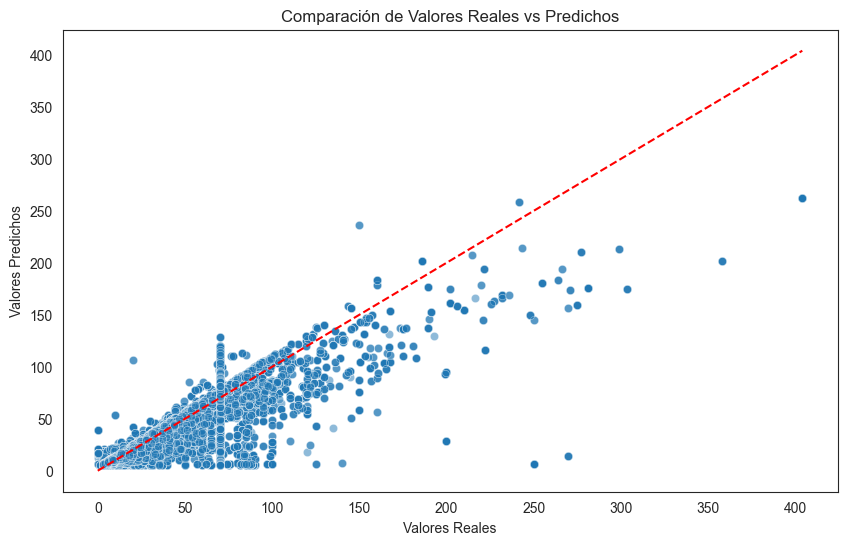

In [123]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión
sns.scatterplot(x='Real', y='Predicción', data=resultados, alpha=0.5)

# Añadir una línea de referencia
plt.plot([resultados['Real'].min(), resultados['Real'].max()],
        [resultados['Real'].min(), resultados['Real'].max()],
        color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos')

# Guardar el gráfico como un archivo de imagen
plt.savefig('resultados_predicciones.png')


Distribución de los puntos:
* La mayoría de los puntos están alineados a lo largo de una línea diagonal, lo que indica una buena correlación entre los valores reales y los predichos. Esto sugiere que tu modelo está haciendo un buen trabajo al predecir los valores.

Línea de referencia:
* La línea roja discontinua representa la línea de referencia donde los valores reales serían iguales a los valores predichos. Cuanto más cerca estén los puntos de esta línea, mejor será la precisión de las predicciones.

Dispersión de los puntos:
* Si los puntos están muy dispersos alrededor de la línea de referencia, puede indicar que hay errores en las predicciones. En tu gráfico, parece que la dispersión es relativamente baja, lo que sugiere que el modelo tiene un buen rendimiento.

Outliers:
* Observa si hay puntos que están muy lejos de la línea de referencia. Estos puntos pueden ser outliers y podrían indicar casos donde el modelo no está funcionando bien. En tu gráfico, no parece haber muchos outliers significativos.

Rendimiento del modelo:
* Las métricas que calculaste (MSE, MAE, R2) también respaldan el análisis visual. Un R2 de 0.878 indica que el modelo explica el 87.8% de la variabilidad en los datos, lo cual es bastante bueno.

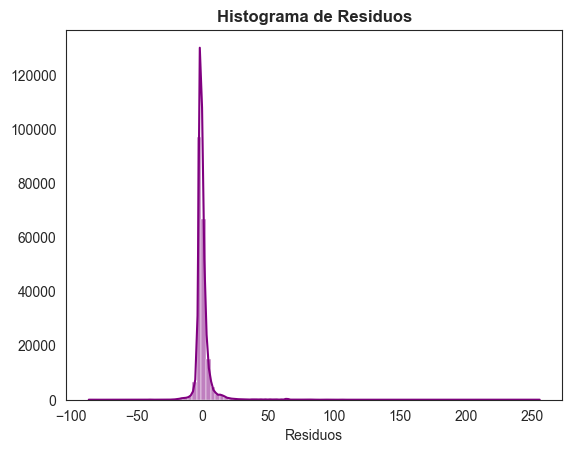

In [124]:
# Calculamos las errores 
residuos = y_test - y_pred

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, bins=100, color= 'purple', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

Distribución de los Residuos:
* La gráfica muestra una distribución de los residuos con un pico muy pronunciado y estrecho centrado alrededor de cero.

* La mayoría de los residuos están cerca de cero, lo que indica que las predicciones del modelo son bastante precisas.

Forma de la Distribución:
* La forma de la distribución parece ser aproximadamente normal (campana), lo cual es una buena señal. En un modelo bien ajustado, los residuos deben distribuirse normalmente alrededor de cero.

* La simetría alrededor de cero sugiere que no hay sesgo sistemático en las predicciones del modelo.

Tamaño de los Residuos:
* La mayoría de los residuos están en el rango de -100 a 250, con una concentración alta cerca de cero.

* Esto indica que, aunque hay algunos errores más grandes, la mayoría de las predicciones están bastante cerca de los valores reales.

Interpretación
* Buen Ajuste del Modelo: La concentración de residuos cerca de cero y la forma aproximadamente normal de la distribución sugieren que el modelo está bien ajustado y hace predicciones precisas.

* Ausencia de Sesgo: La simetría de la distribución alrededor de cero indica que no hay un sesgo significativo en las predicciones del modelo.

* Errores Pequeños: La mayoría de los residuos son pequeños, lo que significa que las predicciones están generalmente cerca de los valores reales.

# Modelo de Ridge()

In [125]:
# Entrenar el modelo de Ridge Regression
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10.0)

In [126]:
# Hacer predicciones en el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test)

In [127]:
mse_ridge = round(mean_squared_error(y_test, y_pred_ridge), 3)
mae_ridge = round(mean_absolute_error(y_test, y_pred_ridge), 3)
r2_ridge = round(r2_score(y_test, y_pred_ridge), 3)

print(f'MSE (Ridge): {mse_ridge}')
print(f'MAE (Ridge): {mae_ridge}')
print(f'R2 (Ridge): {r2_ridge}')

MSE (Ridge): 49.757
MAE (Ridge): 3.047
R2 (Ridge): 0.878


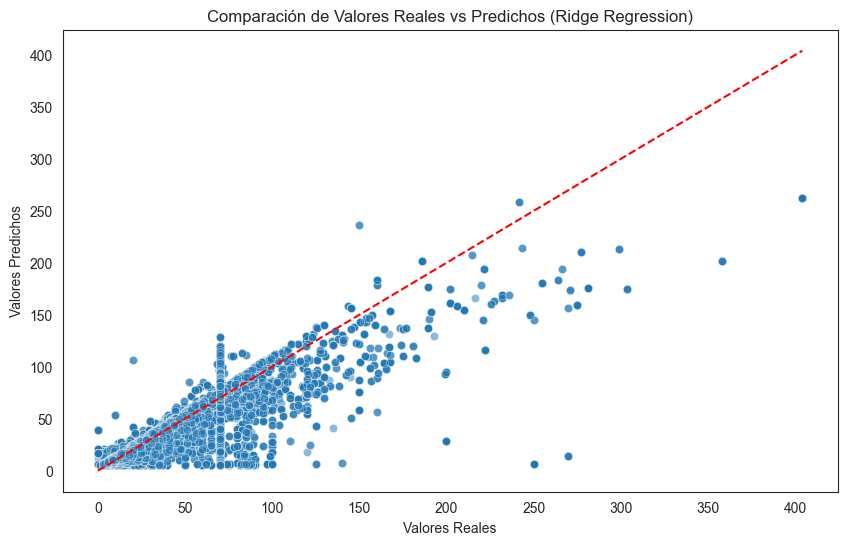

In [128]:
# Crear un DataFrame con los valores reales y predichos
resultados_ridge = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_ridge})

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicción', data=resultados_ridge, alpha=0.5)
plt.plot([resultados_ridge['Real'].min(), resultados_ridge['Real'].max()],
        [resultados_ridge['Real'].min(), resultados_ridge['Real'].max()],
        color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos (Ridge Regression)')
plt.savefig('resultados_predicciones_ridge.png')


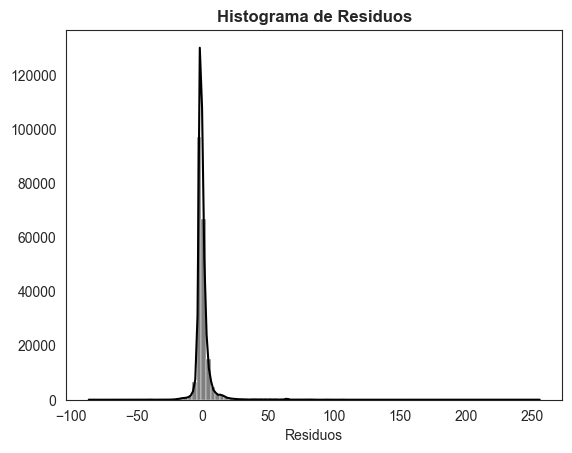

In [130]:
# Calculamos las errores 
residuos = y_test - y_pred_ridge

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, bins=100, color= 'black', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

# Modelo de lasso

In [131]:
# Entrenar el modelo de Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

In [132]:
mse_lasso = round(mean_squared_error(y_test, y_pred_lasso), 3)
mae_lasso = round(mean_absolute_error(y_test, y_pred_lasso), 3)
r2_lasso = round(r2_score(y_test, y_pred_lasso), 3)

print(f'MSE (Lasso): {mse_lasso}')
print(f'MAE (Lasso): {mae_lasso}')
print(f'R2 (Lasso): {r2_lasso}')

MSE (Lasso): 49.801
MAE (Lasso): 3.056
R2 (Lasso): 0.878


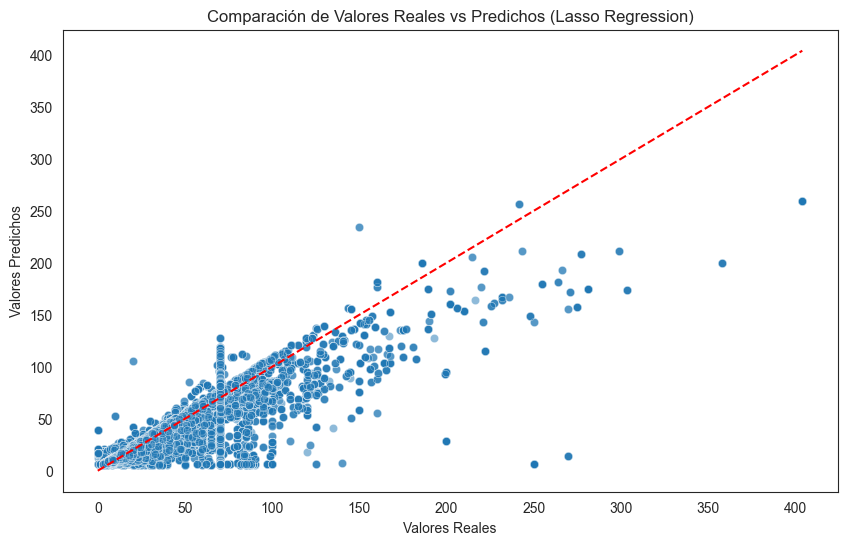

In [133]:
# Crear un DataFrame con los valores reales y predichos
resultados_lasso = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_lasso})

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicción', data=resultados_lasso, alpha=0.5)
plt.plot([resultados_lasso['Real'].min(), resultados_lasso['Real'].max()],
        [resultados_lasso['Real'].min(), resultados_lasso['Real'].max()],
        color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos (Lasso Regression)')
plt.savefig('resultados_predicciones_lasso.png')


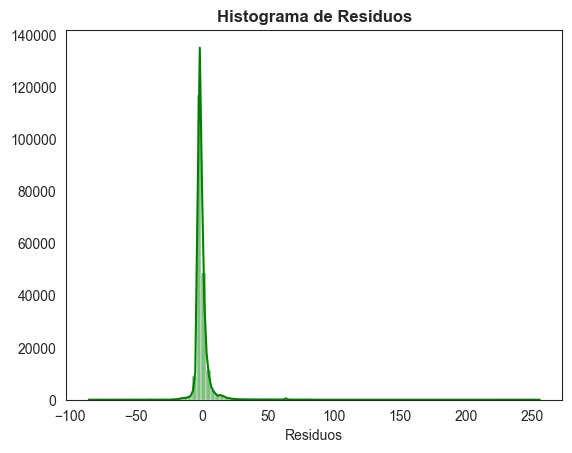

In [134]:
# Calculamos las errores 
residuos = y_test - y_pred_lasso

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, bins=100, color= 'green', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

# Evaluar modelos por lotes de datos

In [138]:
# Función para entrenar y evaluar el modelo en un lote de datos
def train_and_evaluate(batch_data, model_type='ridge'):
    X = batch_data[['trip_distance', 'trip_duration']]
    y = batch_data['fare_amount']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if model_type == 'ridge':
        model = Ridge(alpha=1.0)
    elif model_type == 'lasso':
        model = Lasso(alpha=1.0)
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError("Tipo de modelo no soportado: elige 'ridge', 'lasso' o 'linear'")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = round(mean_squared_error(y_test, y_pred), 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    
    return mse, mae, r2

# Procesar los datos en lotes
batch_size = 1000000
num_batches = len(data_limit) // batch_size

resultados_ridge = []
resultados_lasso = []
resultados_linear = []

for i in range(num_batches):
    batch_data = data_limit.iloc[i*batch_size:(i+1)*batch_size]
    resultados_ridge.append(train_and_evaluate(batch_data, model_type='ridge'))
    resultados_lasso.append(train_and_evaluate(batch_data, model_type='lasso'))
    resultados_linear.append(train_and_evaluate(batch_data, model_type='linear'))

# Promediar los resultados de todos los lotes
mse_avg_ridge = np.mean([res[0] for res in resultados_ridge])
mae_avg_ridge = np.mean([res[1] for res in resultados_ridge])
r2_avg_ridge = np.mean([res[2] for res in resultados_ridge])

mse_avg_lasso = np.mean([res[0] for res in resultados_lasso])
mae_avg_lasso = np.mean([res[1] for res in resultados_lasso])
r2_avg_lasso = np.mean([res[2] for res in resultados_lasso])

mse_avg_linear = np.mean([res[0] for res in resultados_linear])
mae_avg_linear = np.mean([res[1] for res in resultados_linear])
r2_avg_linear = np.mean([res[2] for res in resultados_linear])

print(f'MSE promedio (Ridge): {mse_avg_ridge}')
print(f'MAE promedio (Ridge): {mae_avg_ridge}')
print(f'R2 promedio (Ridge): {r2_avg_ridge}')

print(f'MSE promedio (Lasso): {mse_avg_lasso}')
print(f'MAE promedio (Lasso): {mae_avg_lasso}')
print(f'R2 promedio (Lasso): {r2_avg_lasso}')

print(f'MSE promedio (Linear): {mse_avg_linear}')
print(f'MAE promedio (Linear): {mae_avg_linear}')
print(f'R2 promedio (Linear): {r2_avg_linear}')

MSE promedio (Ridge): 53.770653061224486
MAE promedio (Ridge): 3.1403877551020405
R2 promedio (Ridge): 0.836591836734694
MSE promedio (Lasso): 53.825673469387745
MAE promedio (Lasso): 3.155346938775511
R2 promedio (Lasso): 0.8363061224489796
MSE promedio (Linear): 53.770653061224486
MAE promedio (Linear): 3.1403877551020405
R2 promedio (Linear): 0.836591836734694


# Probando modelos de ensamble

* Los modelos de ensamble, como el árbol de decisión y el bosque aleatorio, se utilizan después del entrenamiento de modelos individuales para mejorar la precisión y la robustez de las predicciones.

### DecisionTreeRegressor

In [140]:
# Iniciamos modelo de ensamble tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [144]:
# Calcular las métricas de error
mse_tree = round(mean_squared_error(y_test, y_pred_tree), 3)
mae_tree = round(mean_absolute_error(y_test, y_pred_tree), 3)
r2_tree = round(r2_score(y_test, y_pred_tree), 3)

print(f'MSE (Decision Tree): {mse_tree}')
print(f'MAE (Decision Tree): {mae_tree}')
print(f'R2 (Decision Tree): {r2_tree}')

MSE (Decision Tree): 1.848
MAE (Decision Tree): 0.097
R2 (Decision Tree): 0.995


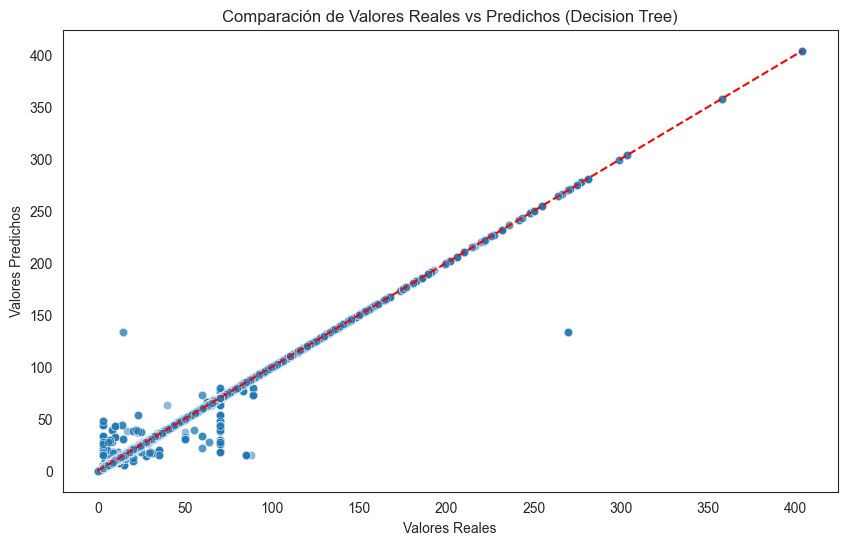

In [145]:
# Crear un DataFrame con los valores reales y predichos
resultados_tree = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_tree})

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicción', data=resultados_tree, alpha=0.5)
plt.plot([resultados_tree['Real'].min(), resultados_tree['Real'].max()],
        [resultados_tree['Real'].min(), resultados_tree['Real'].max()],
        color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos (Decision Tree)')
plt.show()  # Mostrar la gráfica sin guardar

MSE (Mean Squared Error): 1.848
* El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los valores reales. Un MSE bajo indica que los errores de predicción son pequeños, lo cual es positivo.

MAE (Mean Absolute Error): 0.097
* El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales. Un MAE de 0.097 es muy bajo, lo que significa que, en promedio, las predicciones del modelo están muy cerca de los valores reales.

R² (Coeficiente de Determinación): 0.995
* El R² indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R² de 0.995 sugiere que el modelo explica el 99.5% de la variabilidad en los datos, lo cual es excelente.

Interpretación:
* Precisión Alta: Las métricas indican que el modelo de Decision Tree tiene una precisión muy alta en la predicción de las tarifas de taxi.

* Bajo Error: Tanto el MSE como el MAE son bajos, lo que significa que las predicciones del modelo están muy cerca de los valores reales.
Explicación de la Varianza: Un R² de 0.995 es casi perfecto, lo que indica que el modelo está capturando casi toda la variabilidad en los datos.

### RandomForestRegressor

In [150]:
# Entrenar el modelo de Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_forest = forest_model.predict(X_test)

In [151]:
# Calcular las métricas de error
mse_forest = round(mean_squared_error(y_test, y_pred_forest), 3)
mae_forest = round(mean_absolute_error(y_test, y_pred_forest), 3)
r2_forest = round(r2_score(y_test, y_pred_forest), 3)

print(f'MSE (Decision Tree): {mse_forest}')
print(f'MAE (Decision Tree): {mae_forest}')
print(f'R2 (Decision Tree): {r2_forest}')

MSE (Decision Tree): 1.843
MAE (Decision Tree): 0.097
R2 (Decision Tree): 0.995


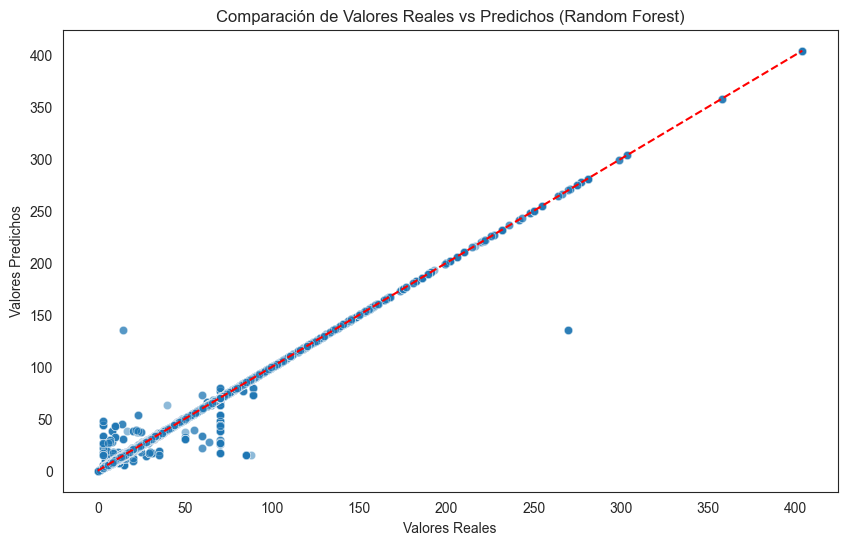

In [153]:
# Crear un DataFrame con los valores reales y predichos
resultados_forest = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_forest})

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicción', data=resultados_forest, alpha=0.5)
plt.plot([resultados_forest['Real'].min(), resultados_forest['Real'].max()],
        [resultados_forest['Real'].min(), resultados_forest['Real'].max()],
        color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos (Random Forest)')
plt.show()  # Mostrar la gráfica sin guardar

In [166]:
# Definir la distribución de hiperparámetros 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'
param_dist = {
    'alpha': np.logspace(-3, 3, 100),  # Valores de alpha en una escala logarítmica
    'solver': ['auto', 'svd', 'lsqr', 'sag'],
    'fit_intercept': [True, False]
}

# Configurar Randomized Search
random_search = RandomizedSearchCV(estimator=ridge_model, 
                                    param_distributions=param_dist, 
                                    n_iter=50,  # Número de combinaciones
                                    cv=5,       # Validaciones cruzadas
                                    n_jobs=-1,  # Utilizar todos los núcleos de CPU disponibles 
                                    random_state=42)

In [167]:
# Ajustar el modelo
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(alpha=10.0), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9....
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'fit_intercept': [True, False],
                                        'solver': ['auto', 'svd', 'lsqr',
                                                   'sag']},
                   random_state=42)

In [168]:
# Mejor combinación de hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Mejor puntaje de validación cruzada
best_score = random_search.best_score_
print("Mejor puntaje de validación cruzada:", best_score)

Mejores hiperparámetros: {'solver': 'sag', 'fit_intercept': True, 'alpha': np.float64(30.538555088334185)}
Mejor puntaje de validación cruzada: 0.8819813998071171


## Guardamos el modelo con joblib encontrado por random_search

In [170]:
print(random_search.best_estimator_)
print(random_search.best_score_)

Ridge(alpha=np.float64(30.538555088334185), solver='sag')
0.8819813998071171


In [171]:
# Guardar el mejor modelo
joblib.dump(random_search.best_estimator_, 'modelo_ridge.joblib')

['modelo_ridge.joblib']